# Semesterarbeit Visualisierung von Taylor-Polynomen Teil 5

## Einleitung: Erstellung von Graphiken mit Matplotlib

Funktionen lassen sich mit Taylor-Polynomen approximieren, dies wird hier mit Matplotlib anhand der Funktionen $sin(x)$ und $ln(x+1)$ visualisiert.

## Theoretische Beschreibung des Lösungsansatzes

Taylor-Polynome sind dazu geschaffen Funktionen in der Umgebung eines Punktes durch Polynome anzunähern.

Die allgemeine Formel um ein Taylor-Polynom bis zum n-ten Grad von $f$ an der Stelle $x_0$ zu bestimmen lautet folgendermassen(1):

$$ \sum_{k=0}^{n} \frac{f^{k}(x_0)}{(k)!}(x-x_0)^k$$

Vorausgesetzt, dass die Funktion $f$ hinreichend oft stetig differenzierbar ist.

Die Reihenentwicklung von $sin(x)$ und $ln(1+x)$ lauten entsprechend(2):

$$ sin(x)= x - \frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+-...=\sum_{k=0}^{\infty} (-1)^k  \frac{x^{2k+1}}{(2k+1)!}, x\in\mathbb{R}$$

$$ ln(1+x)= x - \frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4}+-...=\sum_{k=0}^{\infty} (-1)^k  \frac{x^{k+1}}{2k+1}, -1<x\leqslant1$$


## Implementierungsidee und Programm Code

Zuerst implementiere ich die allgemeine Formel zur bestimmung von Taylor-Polynomen. Danach lassen sich die entsprechende
 Taylor-Entwicklungen plotten. Ich werde eine Darstellung der ersten Paar Glieder in einem Plot jeweils an der Stelle
  $x_0=0$ entwickeln, dieser Fall wird als MacLaurin'sche Reihe bezeichnet.

### 1. Allgemeine Funktion für Taylor-Polynome

Die Implementierung baut stark auf der Vorlage von Mic's Artikel 'Taylor series with Python and Sympy'(3) auf.
 Sie wurde aber an einigen Stellen vereinfacht und ausgebaut.

In [72]:
import math # for the factorial function
import numpy as np
import sympy as sy
from sympy.functions import sin, cos, log
import matplotlib.pyplot as plt

# Define the variable
x = sy.Symbol('x')

# The n-th Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    k = 0 
    p = 0  #Growing Taylor Polynom
    while k <= n:
        p = p + (function.diff(x,k).subs(x,x0))/(math.factorial(k))*(x-x0)**k
        k += 1
    return p

### 2. Plot der sin(x) Reihenentwicklung



Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=11 -x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


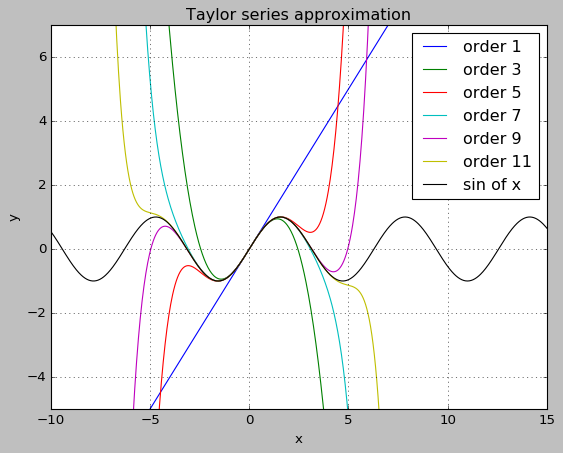

In [76]:
# Plot

plt.style.use("classic")

def plot():
    f = sin(x)
    x_lims = [-10,15]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    
    # Approximate up until 10 starting from 1 and using steps of 2 -> Only uneven orders plotet due to redundance
    for j in range(1,12,2): 
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
        
    # Plot the function to approximate sin(x), in this case
    plt.plot(x1,np.sin(x1),label='sin(x)')
    plt.xlim(x_lims)
    plt.ylim([-5,7])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()

### 3. Plot der ln(x+1) Reihenentwicklung



Taylor expansion at n=1 x
Taylor expansion at n=3 x**3/3 - x**2/2 + x
Taylor expansion at n=5 x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor expansion at n=7 x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor expansion at n=9 x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


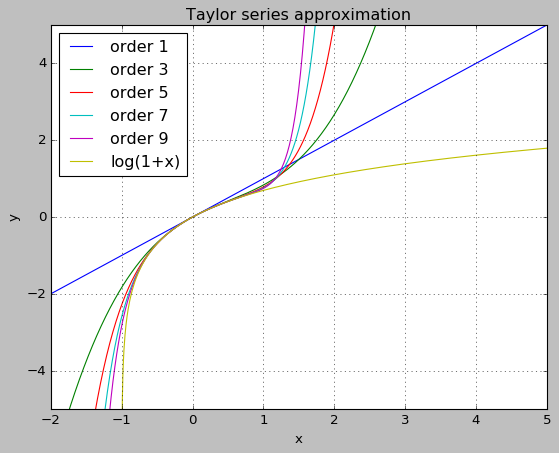

In [74]:

#Define new function
f = log(1+x)

#Plot results
def plot():
    
    x_lims = [-2,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    x2 = np.linspace(-0.999,x_lims[1],800) 
   
   
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,10,2):
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate (log(1+x), in this case)
    plt.plot(x2,np.log(1+x2),label='log(1+x)')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=0)
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()

## Diskussion der Ergebnisse

Die Umsetzung der allgemeinen Taylor-Formel stellte keine grosse Herausforderung dar.
 Sie liefert auch die in der Einleitung zitierte Reihenentwicklung für beide getesteten Formeln korrekt. 

### sin(x) Reihenentwicklung

Es ist deutlich zu sehen, wie sich mit jedem weiteren Glied die Approximation immer weiter an die zugrunde liegende
 Funktion anschmiegt. Es braucht nicht mehr viel Vorstellungskraft um zu sehen, dass bei $n=\infty$ die Sinusfunktion
  fehlerfrei approximiert wäre. 

Zu sehen ist auch das ab der 9.Ordnug eine ganze Periode $[-\pi,\pi]$ korrekt approximiert ist. Da sich die Sinusfunktion
 periodisch wiederholt, kann jetzt jeder x Wert mit  (mod 2 $\pi) -\pi$ mit der Approximation 9. Grades bestimmt werden.

Anhand der ersten 3 Glieder des sin(x) Taylor-Polynoms ist die Kleinwinkelnäherung einfach zu verstehen.
 Welche besagt, dass für kleine Winkel gilt $sin(x)\approx x$

$$ sin(x)= x - \frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+-...$$

Setzen wir eine sehr kleine Zahl ein 0.1 ergibt sich bereits im 2. Glied ($0.1^3/6=0.000167$) eine vernachlässigbare
 Zahl und jedes weitere Glied ist noch viel weniger bedeutend mit steigender Potenz der Glieder.

### ln(x+1) Reihenentwicklung

Die Approximation wird über den Punkt $x=1$ hinaus kaum mehr besser. Deutlich ist hier, dass die Approximation
 wirklich um den Punkt $x_0=0$ statt findet. Sobald man einen x-Wert zu weit von $x_0$ wählt, hier +-1, ist
  die Approximation mit einem grossen Fehler behaftet.


### Ausblick

Grundsätzlich liesse sich jede stetig differenzierbare Funktion approximieren und plotten, damit könnte man die
 Aufgaben hier endlos erweitern. Es sind auch Polynome höheren Grades darstellbar, genau so könnte man die Funktionen
  auch an andere Startwerte approximieren. 



## Literaturverzeichnis

(1)
Formeln, Tabellen, Begriffe, DMK, DPK, DCK, Orell Füssli 2. Auflage 2010, S.77 Taylorpolynom und Taylorreihe

(2)
Formeln, Tabellen, Begriffe, DMK, DPK, DCK, Orell Füssli 2. Auflage 2010, S.79 Reihenentwicklung spezieller
 Funktionen, sin(x), ln(1+x). 

(3)
Taylor series with Python and SymPy, Posted by Mic, Stand: 14.05.2015
http://firsttimeprogrammer.blogspot.com/2015/03/taylor-series-with-python-and-sympy.html







